When the size of the studied system is below the exchange length, the magnetization of the system is uniform
and thus can be described using a single 3d vector. In this situation, the demagnetization field can be calculated
by simply multiplying the demagnetization tensor and the magnetization. Therefore, the demagnetization energy is
equivalent to an effective anisotropy.
Assuming that the external field $\vec{H}=(H, 0, 0)$, easy axis $\hat{u}=(\cos\theta, \sin\theta, 0)$ and unit
magnetization vector $\hat{m}= (\cos\phi, \sin\phi, 0)$, we have
$$
\begin{align}
E &= - K (\vec{m} \cdot \hat{u})^2 - \mu_0 M_s H \cos \phi \\
&= -\frac{K}{2}\left[ 1 + \cos (2(\theta-\phi))+ 4 h \cos\phi \right ]
\end{align}
$$
where $h=H/H_k$ and $H_k = 2K/(\mu_0 M_s)$. In the equilibrium state, the first derivative of the energy with respect to the
magnetization direction is zero, i.e.,
$$
\frac{\partial E}{\partial \phi} = K [-\sin (2(\theta-\phi)) + 2 h \sin \phi] = 0
$$
In principle, there will be a solution of $\phi$ for each given $h$ and $\theta$. The hysteresis loops can be constructed
by plotting $\cos\phi$ as a function of  $h$. The switching field can be obtained by extra setting the second derivative
of the energy with respect to the magnetization direction to zero, i.e.,
$$
\frac{\partial^2 E}{\partial \phi^2} = 2 K [\cos (2(\theta-\phi)) +  h \cos \phi] = 0
$$
The obtained switching field is
$$
h_s=\frac{\left(1-t^2+t^4\right)^{1 / 2}}{1+t^2}
$$
where $t=\tan ^{1 / 3} \theta$. Specifically, $h_s=1/2$ if $\theta=\pi/4$. In this example, we use MicroMagnetic to demostrate
this result.

We chose the system to be a cubic sample, so the demagnetization tensor is $N_x=N_y=N_z=1/3$.
That is, the demagnetization itself does not contribute to the effective anisotropy. So in this simulation,
we have ignored the demagnetization field. The MicroMagnetic script is shown below:

In [1]:
using MicroMagnetic

We create a mesh for a cubic geometry 4nm x 4nm x 4nm

In [2]:
mesh = FDMesh(; nx=4, ny=4, nz=4, dx=1e-9, dy=1e-9, dz=1e-9);

Define simulation parameters. See High-Level Interface.

In [3]:
args = (
    name = "sw",
    task = "Relax",
    mesh = mesh,
    Ms=1.0e6,
    A=1.3e-11,
    m0=(-1, 1, 0),
    Ku=5e4,
    axis=(1, 1, 0),
    stopping_dmdt = 0.05,
    H_s = [(i*1mT, 0, 0) for i=-100:5:100]
);

sim_with(args);

[ Info: MicroSim has been created.
[ Info: Exchange has been added.
[ Info: Uniaxial Anisotropy has been added.
[ Info: Static Zeeman has been added.
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.05 @steps=8, Done!
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.05 @steps=3, Done!
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.05 @steps=3, Done!
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.05 @steps=3, Done!
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.05 @steps=3, Done!
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.05 @steps=4, Done!
[ Info: Running Driver : MicroMagnetic.EnergyMinimiz

For the used anisotropy $K_u=5e4$ A/m$^3$, the expected switch field is $H_c = (1/2) H_K = 39788.7$ A/m.
We plot the hysteresis loops using the following function

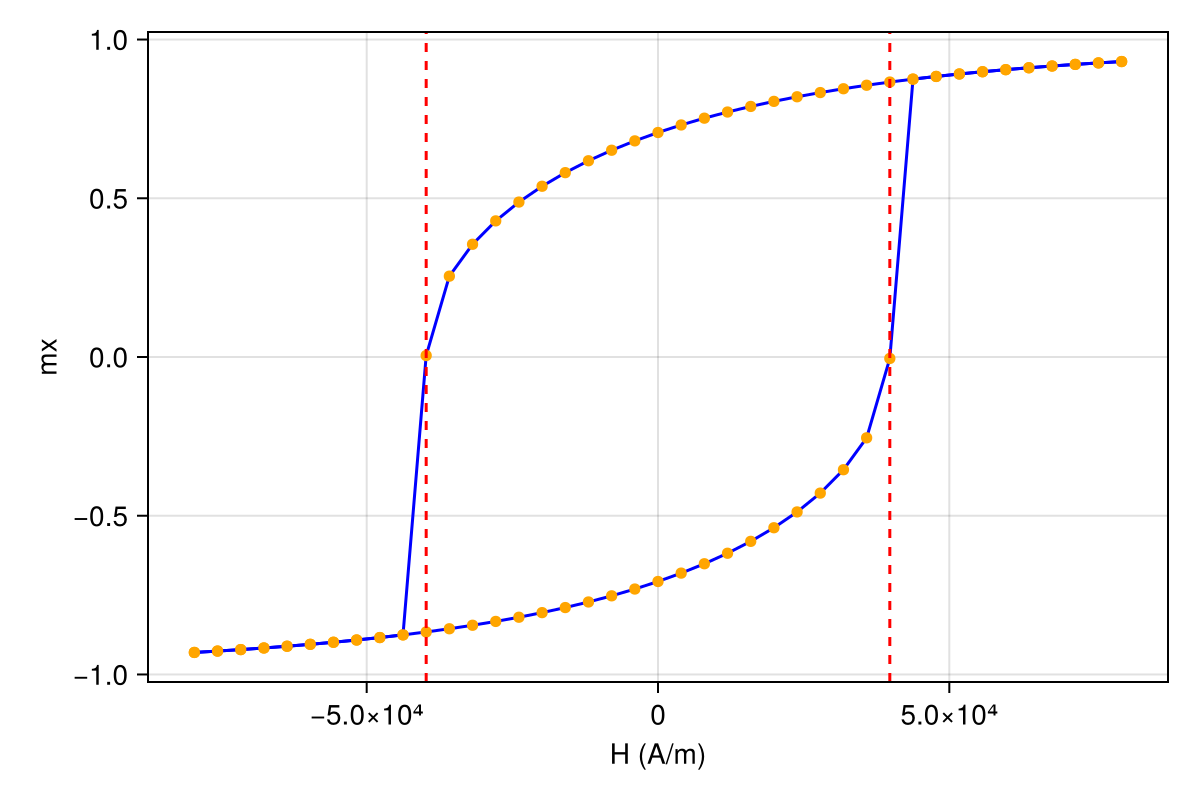

In [4]:
using DelimitedFiles
using CairoMakie

function plot_loop()
    data = readdlm("./sw_sd.txt"; skipstart=2)
    m, H = data[:, 3], data[:, 8]

    fig = Figure(; size=(600, 400))
    ax = Axis(fig[1, 1]; xlabel="H (A/m)", ylabel="mx")

    scatterlines!(ax, H, m; markersize=8, color=:blue, markercolor=:orange)
    scatterlines!(ax, -H, -m; markersize=8, color=:blue, markercolor=:orange)

    expected = 39788.736 # A/m
    vlines!(ax, [expected, -expected]; color=:red, linestyle=:dash)

    return fig
end

plot_loop()

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*